In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\1 - Introduction to Course\\08-Linear-Regression-Models\\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='TV', ylabel='sales'>

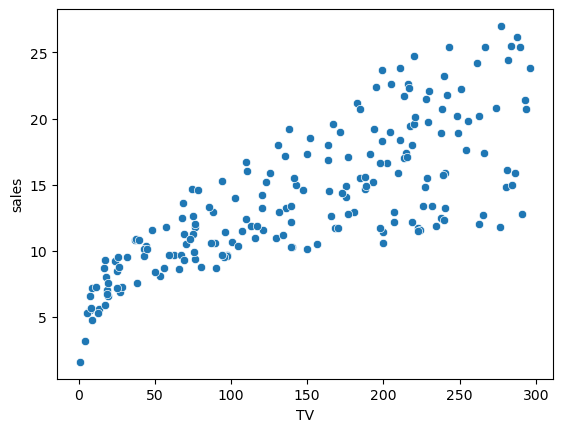

In [4]:
sns.scatterplot(data=df,y='sales',x='TV')
# sns.scatterplot(data=df,y='sales',x='newspaper')
# sns.scatterplot(data=df,y='sales',x='radio')



In [5]:
X=df.drop('sales',axis=1)
y=df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [9]:
Y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [10]:
len(X_test)

60

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

In [13]:
model.fit(X_train,Y_train)


LinearRegression()

In [29]:
model_predictions= model.predict(X_test)
# model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

<Axes: xlabel='sales', ylabel='Count'>

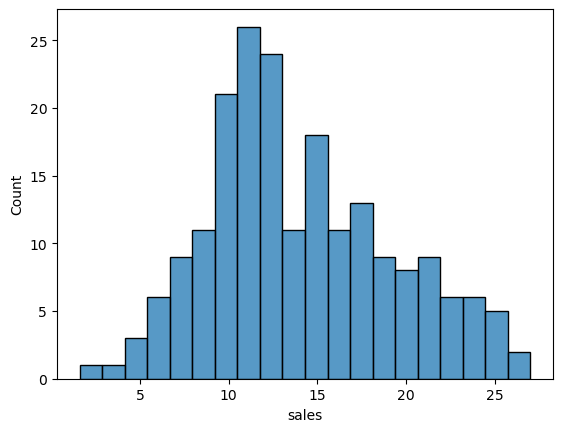

In [15]:
sns.histplot(data=df,x='sales',bins=20)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [17]:
mean_absolute_error(Y_test,model_predictions)

1.2137457736144803

In [18]:
mean_squared_error(Y_test,model_predictions)

2.2987166978863782

In [19]:
# ROOT MEAN SQUARED ERROR
np.sqrt(mean_squared_error(Y_test,model_predictions))

1.516151937599388

In [20]:
test_residuals=Y_test-model_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

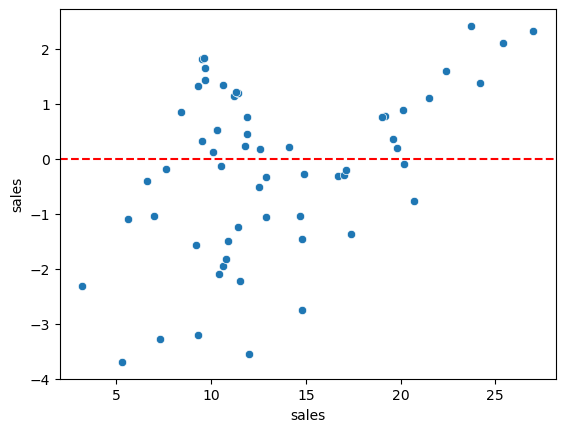

In [21]:
sns.scatterplot(x=Y_test,y=test_residuals)
plt.axhline(c='r',ls='--')

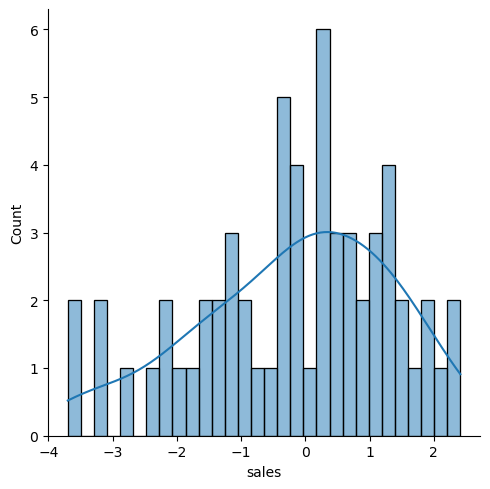

In [22]:
sns.displot(x=test_residuals,bins=30,kde=True)

In [23]:
import scipy as sp

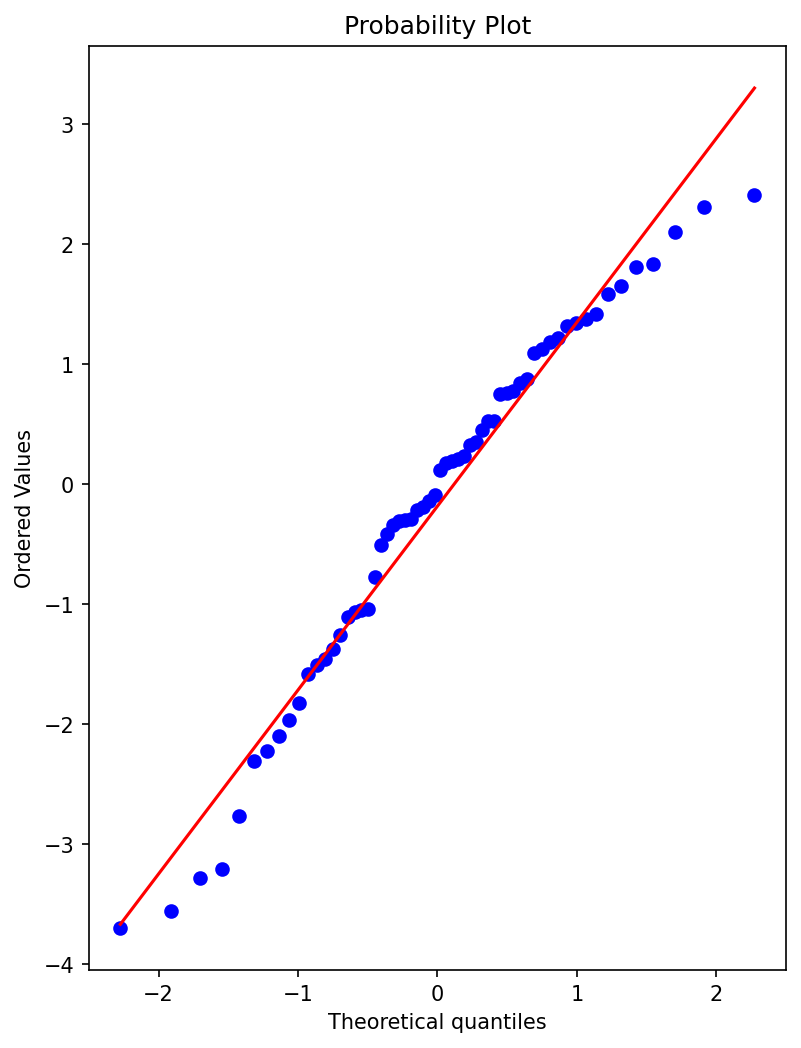

In [24]:
fig,ax=plt.subplots(figsize=(6,8),dpi=150)
_ =sp.stats.probplot(test_residuals,plot=ax)

In [25]:
final_model=LinearRegression()

In [26]:
final_model.fit(X,y)

LinearRegression()

In [39]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [40]:
y_hat=final_model.predict(X)

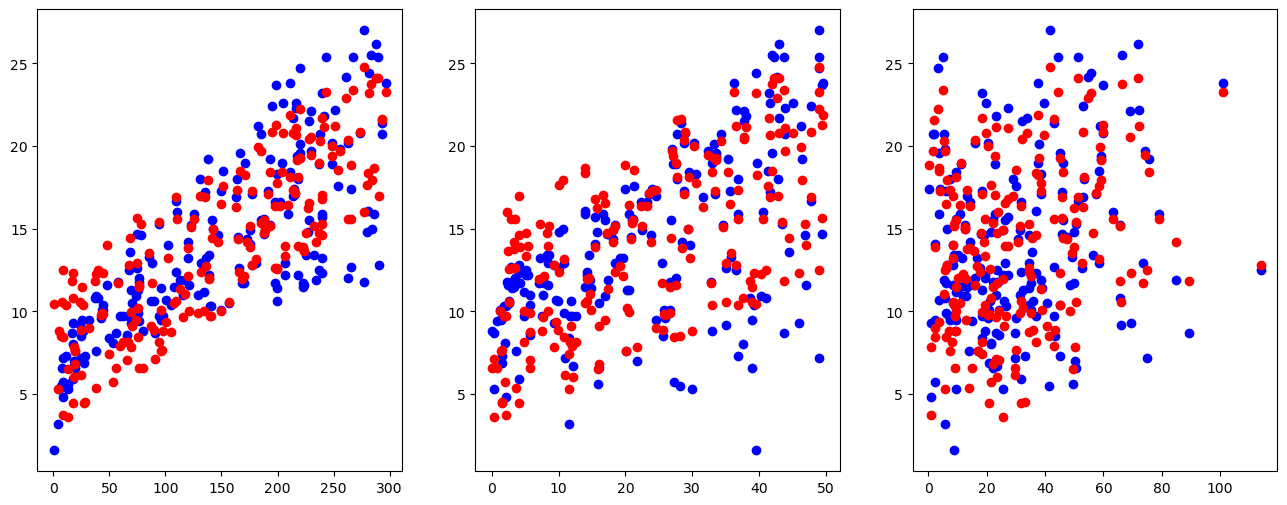

In [41]:
fig,axes=plt.subplots(figsize=(16,6),ncols=3,nrows=1)
axes[0].plot(df['TV'],df['sales'],'o',c='b')
axes[0].plot(df['TV'],y_hat,'o',c='r')

axes[1].plot(df['radio'],df['sales'],'o',c='b')
axes[1].plot(df['radio'],y_hat,'o',c='r')

axes[2].plot(df['newspaper'],df['sales'],'o',c='b')
axes[2].plot(df['newspaper'],y_hat,'o',c='r')

In [43]:
from joblib import dump,load


In [44]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [45]:
loaded_model=load('final_sales_model.joblib')

In [46]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
X.shape

(200, 3)

In [52]:
new_data=[[149,22,12]]

In [53]:
loaded_model.predict(new_data)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])